In [32]:
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Define Matplot Style

In [33]:
#mpl.style.use('seaborn-v0_8')
#mpl.style.use('seaborn-v0_8-bright')
#mpl.style.use('ggplot')

# Model Definition

### Original FP32 Model

All Bias set to True, as it would be in the model after fusing the BatchNorm.

If it is not done this way, BatchNorm parameters would be part of the model, so they should be included.

In [34]:
fp32_model = {
    # 224x224
    'conv1' : {
        'in': 3,
        'out': 32,
        'kernel': 3,
        'layer_size': 'small',
        'is_bias': True
    },
    # 112x112
    'conv2' : {
        'in': 32,
        'out': 16,
        'kernel': 3,
        'layer_size': 'small',
        'is_bias': True
    },
    # 56x56
    'conv31' : {
        'in': 16,
        'out': 16,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv32' : {
        'in': 16,
        'out': 32,
        'kernel': 3,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv33' : {
        'in': 32,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv34' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    # 28x28
    'conv41' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv42' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv43' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv44' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv45' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv46' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    # 14x14
    'conv51' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv52' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv53' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv54' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv55' : {
        'in': 64,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv56' : {
        'in': 64,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    # 7x7
    'conv61' : {
        'in': 64,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv62' : {
        'in': 64,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    # Head
    'conv71' : {
        'in': 64,
        'out': 64,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
    'conv72' : {
        'in': 64,
        'out': 16,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
    'conv73' : {
        'in': 16,
        'out': 16,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
    'conv74' : {
        'in': 16,
        'out': 12,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
}

### Compressed Model

In [35]:
comp_model = {
    # 224x224
    'conv10' : {
        'in': 3,
        'out': 5,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv11' : {
        'in': 5,
        'out': 32,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    # 112x112
    'conv20' : {
        'in': 32,
        'out': 4,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv21' : {
        'in': 4,
        'out': 11,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    # 56x56
    'conv310' : {
        'in': 11,
        'out': 3,
        'kernel': (1, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv311' : {
        'in': 3,
        'out': 14,
        'kernel': (1, 1),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv320' : {
        'in': 14,
        'out': 14,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv321' : {
        'in': 14,
        'out': 25,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv33' : {
        'in': 25,
        'out': 22,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv340' : {
        'in': 22,
        'out': 30,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv341' : {
        'in': 30,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    # 28x28
    'conv41' : {
        'in': 64,
        'out': 28,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv420' : {
        'in': 28,
        'out': 38,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv421' : {
        'in': 38,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv43' : {
        'in': 64,
        'out': 28,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv440' : {
        'in': 28,
        'out': 25,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv441' : {
        'in': 25,
        'out': 57,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv450' : {
        'in': 57,
        'out': 15,
        'kernel': (1, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv451' : {
        'in': 15,
        'out': 28,
        'kernel': (1, 1),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv460' : {
        'in': 28,
        'out': 28,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv461' : {
        'in': 28,
        'out': 57,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    # 14x14
    'conv510' : {
        'in': 57,
        'out': 14,
        'kernel': (1, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv511' : {
        'in': 14,
        'out': 32,
        'kernel': (1, 1),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv520' : {
        'in': 32,
        'out': 40,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv521' : {
        'in': 40,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv53' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv540' : {
        'in': 32,
        'out': 45,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv541' : {
        'in': 45,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    'conv550' : {
        'in': 64,
        'out': 67,
        'kernel': (3, 1),
        'layer_size': 'big',
        'is_bias': False
    },
    'conv551' : {
        'in': 67,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'big',
        'is_bias': True
    },
    'conv560' : {
        'in': 64,
        'out': 77,
        'kernel': (3, 1),
        'layer_size': 'big',
        'is_bias': False
    },
    'conv561' : {
        'in': 77,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'big',
        'is_bias': True
    },
    # 7x7
    'conv61' : {
        'in': 64,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv62' : {
        'in': 64,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    # Head
    'conv71' : {
        'in': 64,
        'out': 64,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
    'conv72' : {
        'in': 64,
        'out': 16,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
    'conv73' : {
        'in': 16,
        'out': 16,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
    'conv74' : {
        'in': 16,
        'out': 12,
        'kernel': 1,
        'layer_size': 'head',
        'is_bias': True
    },
}

# Print Model

In [36]:
def print_model(model_dic):
    for k in model_dic.keys():
        print(k)
        for kin, v in model_dic[k].items():
            print(f'\t{kin:<15}: ' + str(v).rjust(8))

### Original FP32 model, no SVD, no Pruning

In [37]:
print_model(fp32_model)

conv1
	in             :        3
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :     True
conv2
	in             :       32
	out            :       16
	kernel         :        3
	layer_size     :    small
	is_bias        :     True
conv31
	in             :       16
	out            :       16
	kernel         :        1
	layer_size     :    small
	is_bias        :     True
conv32
	in             :       16
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :     True
conv33
	in             :       32
	out            :       32
	kernel         :        1
	layer_size     :    small
	is_bias        :     True
conv34
	in             :       32
	out            :       64
	kernel         :        3
	layer_size     :      big
	is_bias        :     True
conv41
	in             :       64
	out            :       32
	kernel         :        1
	layer_size     :    small
	is_bias        :     True
conv42
	

### Compressed Model: SVD and Pruning

In [38]:
print_model(comp_model)

conv10
	in             :        3
	out            :        5
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
conv11
	in             :        5
	out            :       32
	kernel         :   (1, 3)
	layer_size     :    small
	is_bias        :     True
conv20
	in             :       32
	out            :        4
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
conv21
	in             :        4
	out            :       11
	kernel         :   (1, 3)
	layer_size     :    small
	is_bias        :     True
conv310
	in             :       11
	out            :        3
	kernel         :   (1, 1)
	layer_size     :    small
	is_bias        :    False
conv311
	in             :        3
	out            :       14
	kernel         :   (1, 1)
	layer_size     :    small
	is_bias        :     True
conv320
	in             :       14
	out            :       14
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
con

# Functions to Calculate Conv and Linear Size

In [39]:
def conv_size(conv_dic):
    '''
    Calculates number of weights and bias
        - weights = kernel**2 * in * out
        - bias = out
    - return: number of weights, number of bias
    '''
    if isinstance(conv_dic['kernel'], int):
        return (
            (conv_dic['kernel']**2) * conv_dic['in']  * conv_dic['out'], 
            conv_dic['out'] if conv_dic['is_bias'] else 0
        )
    elif isinstance(conv_dic['kernel'], tuple):
        return (
            (conv_dic['kernel'][0]*conv_dic['kernel'][1]) * conv_dic['in']  * conv_dic['out'], 
            conv_dic['out'] if conv_dic['is_bias'] else 0 
        )
    else:
        print("Kernel is not well defined")
        
def linear_size(linear_dic):
    '''
    Calculates number of weights and bias
        - weights = in * out
        - bias = out
    - return: number of weights, number of bias
    '''
    return linear_dic['in'] * linear_dic['out'],  linear_dic['out'] 

# Update Model Dic with Weights and Bias

In [40]:
def add_weights_bias(model):
    for k in model.keys():
        if 'conv' in k:
            weights, bias = conv_size(model[k])
            model[k].update({'weights': weights, 'bias': bias})
        elif 'linear' in k:
            weights, bias = linear_size(model[k])
            model[k].update({'weights': weights, 'bias': bias})
        else:
            print('Wrong layer name')

### FP32 Model

In [41]:
add_weights_bias(fp32_model)
print_model(fp32_model)

conv1
	in             :        3
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :     True
	weights        :      864
	bias           :       32
conv2
	in             :       32
	out            :       16
	kernel         :        3
	layer_size     :    small
	is_bias        :     True
	weights        :     4608
	bias           :       16
conv31
	in             :       16
	out            :       16
	kernel         :        1
	layer_size     :    small
	is_bias        :     True
	weights        :      256
	bias           :       16
conv32
	in             :       16
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :     True
	weights        :     4608
	bias           :       32
conv33
	in             :       32
	out            :       32
	kernel         :        1
	layer_size     :    small
	is_bias        :     True
	weights        :     1024
	bias           :       32
conv34
	in            

### Compressed Model

In [42]:
add_weights_bias(comp_model)
print_model(comp_model)

conv10
	in             :        3
	out            :        5
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
	weights        :       45
	bias           :        0
conv11
	in             :        5
	out            :       32
	kernel         :   (1, 3)
	layer_size     :    small
	is_bias        :     True
	weights        :      480
	bias           :       32
conv20
	in             :       32
	out            :        4
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
	weights        :      384
	bias           :        0
conv21
	in             :        4
	out            :       11
	kernel         :   (1, 3)
	layer_size     :    small
	is_bias        :     True
	weights        :      132
	bias           :       11
conv310
	in             :       11
	out            :        3
	kernel         :   (1, 1)
	layer_size     :    small
	is_bias        :    False
	weights        :       33
	bias           :        0
conv311
	in        

# Print Number of Weights Per Layer

In [43]:
def print_model_params_per_layer(model_dic, small_or_big=True):
    total_params = 0
    for k in model_dic.keys():
        params = model_dic[k]["weights"] + model_dic[k]["bias"]
        total_params += params
        if small_or_big == True:
            text_size = "big" if params > 10000 else "small"
        else:
            text_size = ''    
        print(f'{k:<7}: ' + 
              f'{params}'.rjust(5) + 
              f' ({text_size})'.rjust(9) + 
              ' - Size def: ' + f'{model_dic[k]["layer_size"]}'.rjust(6))
    print('------------------------------------------')
    print(f'Total Params: {total_params}')

### FP32 Model

In [44]:
print_model_params_per_layer(fp32_model)

conv1  :   896  (small) - Size def:  small
conv2  :  4624  (small) - Size def:  small
conv31 :   272  (small) - Size def:  small
conv32 :  4640  (small) - Size def:  small
conv33 :  1056  (small) - Size def:  small
conv34 : 18496    (big) - Size def:    big
conv41 :  2080  (small) - Size def:  small
conv42 : 18496    (big) - Size def:    big
conv43 :  2080  (small) - Size def:  small
conv44 : 18496    (big) - Size def:    big
conv45 :  2080  (small) - Size def:  small
conv46 : 18496    (big) - Size def:    big
conv51 :  2080  (small) - Size def:  small
conv52 : 18496    (big) - Size def:    big
conv53 :  2080  (small) - Size def:  small
conv54 : 18496    (big) - Size def:    big
conv55 : 36928    (big) - Size def:    big
conv56 : 36928    (big) - Size def:    big
conv61 : 36928    (big) - Size def:    big
conv62 : 36928    (big) - Size def:    big
conv71 :  4160  (small) - Size def:   head
conv72 :  1040  (small) - Size def:   head
conv73 :   272  (small) - Size def:   head
conv74 :   

### Compressed Model

In [45]:
print_model_params_per_layer(comp_model)

conv10 :    45  (small) - Size def:  small
conv11 :   512  (small) - Size def:  small
conv20 :   384  (small) - Size def:  small
conv21 :   143  (small) - Size def:  small
conv310:    33  (small) - Size def:  small
conv311:    56  (small) - Size def:  small
conv320:   588  (small) - Size def:  small
conv321:  1075  (small) - Size def:  small
conv33 :   572  (small) - Size def:  small
conv340:  1980  (small) - Size def:  small
conv341:  5824  (small) - Size def:  small
conv41 :  1820  (small) - Size def:  small
conv420:  3192  (small) - Size def:  small
conv421:  7360  (small) - Size def:  small
conv43 :  1820  (small) - Size def:  small
conv440:  2100  (small) - Size def:  small
conv441:  4332  (small) - Size def:  small
conv450:   855  (small) - Size def:  small
conv451:   448  (small) - Size def:  small
conv460:  2352  (small) - Size def:  small
conv461:  4845  (small) - Size def:  small
conv510:   798  (small) - Size def:  small
conv511:   480  (small) - Size def:  small
conv520:  3

# Calculate Number of Weights for Small and Big Layers

In [46]:
def small_big_weights_number(model_dic):
    small_weights = 0
    big_weights = 0
    head_weights = 0
    for k in model_dic.keys():
        if model_dic[k]['layer_size'] == 'small':
            small_weights += model_dic[k]['weights'] 
        elif model_dic[k]['layer_size'] == 'big':
            big_weights += model_dic[k]['weights'] 
        elif model_dic[k]['layer_size'] == 'head':
            head_weights += model_dic[k]['weights'] 
        else:
            print("Error: layer size is not well defined")

    return small_weights, big_weights, head_weights

# Pie Comparing Weights Portion of Small and Big Layers

### Before AIMET

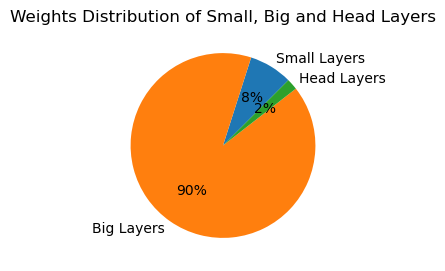

In [47]:
labels = ['Small Layers', 'Big Layers', 'Head Layers']

small_weights, big_weights, head_weights = small_big_weights_number(fp32_model)

fig, ax = plt.subplots(figsize=(4,3))
ax.pie([small_weights, big_weights, head_weights], labels = labels, autopct='%.0f%%', startangle=45)
ax.set_title("Weights Distribution of Small, Big and Head Layers")
fig.savefig('model_size_images/weights_percentage.png')

### After AIMET

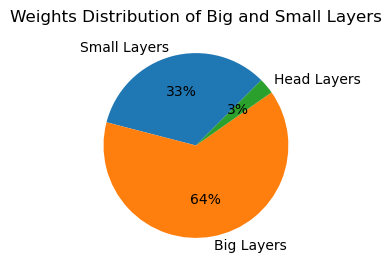

In [48]:
labels = ['Small Layers', 'Big Layers', 'Head Layers']

small_weights, big_weights, head_weights = small_big_weights_number(comp_model)

fig, ax = plt.subplots(figsize=(4,3))
ax.pie([small_weights, big_weights, head_weights], labels = labels, autopct='%.0f%%', startangle=45)
ax.set_title("Weights Distribution of Big and Small Layers")
fig.savefig('model_size_images/aimet_weights_percentage.png')

# Calculate Size of Each Layer

In [49]:
def add_layer_size(model_dic, small_size, big_size, head_size, bias_size):

    model = copy.deepcopy(model_dic)
    for k in model.keys():
        bias_bits = model[k]['bias'] * bias_size
        weights_bits = 0
        if model[k]['layer_size'] == "small":
            weights_bits = model[k]['weights'] * small_size
        elif model[k]['layer_size'] == "big":
            weights_bits = model[k]['weights'] * big_size
        elif model[k]['layer_size'] == "head":
            weights_bits = model[k]['weights'] * head_size
        else:
            print('Wrong layer type: small, big or head')
        
        model[k].update({'weights_bits': weights_bits, 'bias_bits': bias_bits})

    return model

# Bits Overview

In [50]:
def get_layers_total_bits(model):
    '''
    Compute total bits summing each layer. It returns separated layers bits too.

    Return:
        - total bits
        - total bits of small layers
        - total bits of big layers
        - total bits of head layers
        - total bits of bias
    '''
    
    small_layers_bits = 0
    big_layers_bits = 0
    head_layers_bits = 0
    bias_bits = 0
    
    for k in model.keys():
        if model[k]['layer_size'] == 'small':
            small_layers_bits += model[k]['weights_bits'] 
        elif model[k]['layer_size'] == 'big':
            big_layers_bits += model[k]['weights_bits'] 
        elif model[k]['layer_size'] == 'head':
            head_layers_bits += model[k]['weights_bits']
        bias_bits += model[k]['bias_bits']

    return {
        'total': small_layers_bits + big_layers_bits + bias_bits + head_layers_bits,
        'small': small_layers_bits,
        'big': big_layers_bits,
        'head' : head_layers_bits,
        'bias': bias_bits
    }

# Comparing Models

### Defining some models

In [51]:
# Model 1: NO COMPRESSION, FP32
wb_small_1 = 4
wb_big_1 = 2
wb_head_1 = 8
bias_bits_1 = 4
model_name_1 = f'No Comp\nw{str(wb_small_1)}W{str(wb_big_1)}h{str(wb_head_1)}b{str(bias_bits_1)}'

# Model 2: COMPRESSION
wb_small_2 = 8
wb_big_2 = 8
wb_head_2 = 8
bias_bits_2 = 8
model_name_2 = f'Med\nw{str(wb_small_2)}W{str(wb_big_2)}h{str(wb_head_2)}b{str(bias_bits_2)}'

# Model 3: COMPRESSION
wb_small_3 = 5
wb_big_3 = 4
wb_head_3 = 8
bias_bits_3 = 5
model_name_3 = f'Med\nw{str(wb_small_3)}W{str(wb_big_3)}h{str(wb_head_3)}b{str(bias_bits_3)}'

# Model 4: COMPRESSION
wb_small_4 = 4
wb_big_4 = 3
wb_head_4 = 8
bias_bits_4 = 4
model_name_4 = f'Med\nw{str(wb_small_4)}W{str(wb_big_4)}h{str(wb_head_4)}b{str(bias_bits_4)}'

### Calculating Bits

In [52]:
model1 = add_layer_size(fp32_model, wb_small_1, wb_big_1, wb_head_1, bias_bits_1)
model2 = add_layer_size(comp_model, wb_small_2, wb_big_2, wb_head_2, bias_bits_2)
model3 = add_layer_size(comp_model, wb_small_3, wb_big_3, wb_head_3, bias_bits_3)
model4 = add_layer_size(comp_model, wb_small_4, wb_big_4, wb_head_4, bias_bits_4)

### Bits for all Models

In [53]:
model_bits_1 = get_layers_total_bits(model1)
model_bits_2 = get_layers_total_bits(model2)
model_bits_3 = get_layers_total_bits(model3)
model_bits_4 = get_layers_total_bits(model4)

## Some Plots

In [54]:
#xticks = ['Model1', 'Model2', 'Model3', 'Model4']
xticks = [model_name_1, model_name_2, model_name_3, model_name_4] 
yticks = [model_bits_1['total'], model_bits_2['total'], model_bits_3['total'], model_bits_4['total']]
print(yticks)

[651184, 1626064, 903970, 706280]


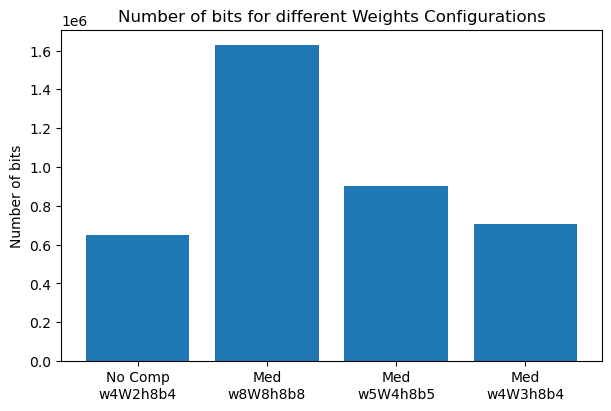

In [55]:
fig, ax = plt.subplots(layout='constrained', figsize=(6,4))
ax.bar(xticks, yticks)
ax.set_ylabel("Number of bits")
ax.set_title("Number of bits for different Weights Configurations")
fig.savefig('model_size_images/bits_number.png')
plt.show()

# Bars

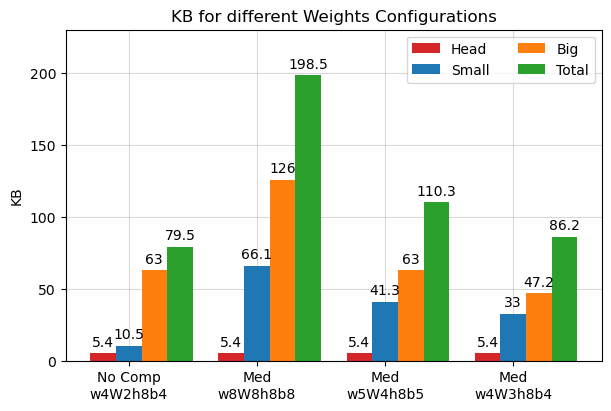

In [56]:
xticks = (model_name_1, model_name_2, model_name_3, model_name_4)
yticks = {
    # 'Bias': np.round(np.array([model_bits_1['bias'], 
    #                           model_bits_2['bias'], 
    #                           model_bits_3['bias'], 
    #                           model_bits_4['bias']])/(8*1024), decimals=1),
    'Head': np.round(np.array([model_bits_1['head'], 
                              model_bits_2['head'], 
                              model_bits_3['head'], 
                              model_bits_4['head']])/(8*1024), decimals=1),
    'Small': np.round(np.array([model_bits_1['small'], 
                                model_bits_2['small'], 
                                model_bits_3['small'], 
                                model_bits_4['small']])/(8*1024), decimals=1),
    'Big': np.round(np.array([model_bits_1['big'], 
                              model_bits_2['big'], 
                              model_bits_3['big'], 
                              model_bits_4['big']])/(8*1024), decimals=1),
    'Total': np.round(np.array([model_bits_1['total'], 
                                model_bits_2['total'], 
                                model_bits_3['total'], 
                                model_bits_4['total']])/(8*1024), decimals=1),
}

x = np.arange(len(xticks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(6,4))

bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']
i = 0
for k, v in yticks.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k, color=bar_colors[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('KB')
ax.set_title("KB for different Weights Configurations")
ax.set_xticks(x + width, xticks)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 230)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', alpha=0.3)
ax.xaxis.grid(color='gray', alpha=0.3)

fig.savefig('model_size_images/KB_total_small_big.png')
plt.show()

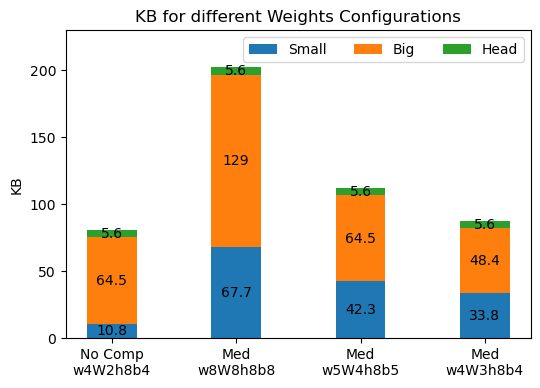

In [57]:
xticks = (model_name_1, model_name_2, model_name_3, model_name_4)
yticks = {
    'Small': np.round(np.array([model_bits_1['small'], 
                                model_bits_2['small'], 
                                model_bits_3['small'], 
                                model_bits_4['small']])/8000, decimals=1),
    'Big': np.round(np.array([model_bits_1['big'], 
                              model_bits_2['big'], 
                              model_bits_3['big'], 
                              model_bits_4['big']])/8000, decimals=1),
    'Head': np.round(np.array([model_bits_1['head'], 
                                model_bits_2['head'], 
                                model_bits_3['head'], 
                                model_bits_4['head']])/8000, decimals=1),
}

width = 0.4  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6,4))
bottom = np.zeros(4)

for k, v in yticks.items():
    p = ax.bar(xticks, v, width, label=k, bottom=bottom)
    bottom += v

    ax.bar_label(p, label_type='center')

ax.set_title('KB for different Weights Configurations')
ax.set_ylabel('KB')
ax.set_ylim(0, 230)
ax.legend(ncols=3)

fig.savefig('model_size_images/KB_small_big.png')
plt.show()

# Pies to view the impact of small, big and bias

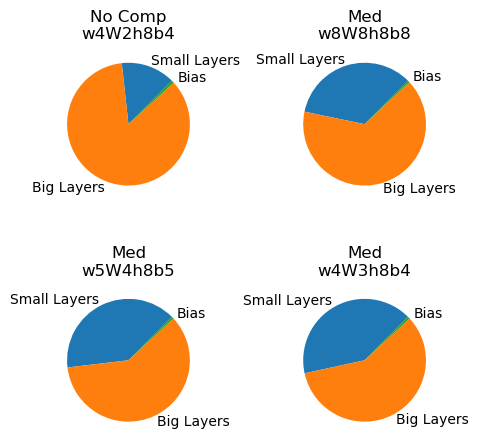

In [58]:
labels = ['Small Layers', 'Big Layers', 'Bias']

fig, ax = plt.subplots(2, 2, figsize=(5,5))

plt.subplot(2, 2, 1)
size = [model_bits_1['small'], model_bits_1['big'], model_bits_1['bias']] 
plt.pie(size, labels = labels, startangle=45)
plt.title(model_name_1)

plt.subplot(2, 2, 2)
size = [model_bits_2['small'], model_bits_2['big'], model_bits_2['bias']] 
plt.pie(size, labels = labels, startangle=45)
plt.title(model_name_2)

plt.subplot(2, 2, 3)
size = [model_bits_3['small'], model_bits_3['big'], model_bits_3['bias']] 
plt.pie(size, labels = labels, startangle=45)
plt.title(model_name_3)

plt.subplot(2, 2, 4)
size = [model_bits_4['small'], model_bits_4['big'], model_bits_4['bias']] 
plt.pie(size, labels = labels, startangle=45)
plt.title(model_name_4)

plt.tight_layout(pad=2)
fig.savefig('model_size_images/bits_pies.png')
plt.show()